
# Mapbox Satellite Image Collection

This notebook downloads satellite images for each house location
using the Mapbox Static Images API.

These images will later be used for CNN-based feature extraction.


In [1]:
import pandas as pd
import numpy as np
import os
import requests

from PIL import Image
from io import BytesIO
from tqdm import tqdm



In [2]:
train_df = pd.read_excel("train(1).xlsx")

print("Dataset shape:", train_df.shape)
train_df[["lat", "long"]].head()


Dataset shape: (16209, 21)


,lat,long
0,47.4362,-122.187
1,47.4034,-122.187
2,47.2704,-122.313
3,47.5321,-122.073
4,47.3715,-122.074


In [3]:
train_df = train_df.dropna(subset=["lat", "long"])
train_df.reset_index(drop=True, inplace=True)

print("Rows after cleaning:", train_df.shape[0])


Rows after cleaning: 16209


In [4]:
IMAGE_DIR = "mapbox_satellite_images"
os.makedirs(IMAGE_DIR, exist_ok=True)

IMAGE_DIR


'mapbox_satellite_images'

In [5]:
MAPBOX_TOKEN = "pk.eyJ1IjoicHJhbW9kaGl0aGEyIiwiYSI6ImNtanpzZTRwNjQxZHkzZnNlbW52dWk0ZmYifQ.kpuQeW6QnVVGGa-5gtXnPw"

ZOOM = 18
IMG_SIZE = "224x224"


In [6]:
def download_mapbox_image(lat, lon, save_path):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{ZOOM}/"
        f"{IMG_SIZE}"
        f"?access_token={MAPBOX_TOKEN}"
    )

    response = requests.get(url)

    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(save_path)
        return True
    else:
        return False


In [7]:
test_lat = train_df.loc[0, "lat"]
test_lon = train_df.loc[0, "long"]

download_mapbox_image(
    test_lat,
    test_lon,
    os.path.join(IMAGE_DIR, "test.png")
)


True

In [8]:
success, failed = 0, 0

for idx, row in tqdm(train_df.iterrows(), total=len(train_df)):
    lat, lon = row["lat"], row["long"]
    img_path = os.path.join(IMAGE_DIR, f"house_{idx}.png")

    if not os.path.exists(img_path):
        ok = download_mapbox_image(lat, lon, img_path)
        if ok:
            success += 1
        else:
            failed += 1

print("Images downloaded:", success)
print("Images failed    :", failed)


100%|██████████████████████████████████████████████████████████████████████████| 16209/16209 [2:26:14<00:00,  1.85it/s]

Images downloaded: 16209
Images failed    : 0


In [9]:
len(os.listdir(IMAGE_DIR))

16210

In [10]:
train_df["image_path"] = train_df.index.map(
    lambda x: f"{IMAGE_DIR}/house_{x}.png"
)

train_df[["lat", "long", "image_path"]].head()


,lat,long,image_path
0,47.4362,-122.187,mapbox_satellite_images/house_0.png
1,47.4034,-122.187,mapbox_satellite_images/house_1.png
2,47.2704,-122.313,mapbox_satellite_images/house_2.png
3,47.5321,-122.073,mapbox_satellite_images/house_3.png
4,47.3715,-122.074,mapbox_satellite_images/house_4.png


In [11]:
train_df.to_csv("train_with_mapbox_images.csv", index=False)

print("Saved dataset with image paths")


Saved dataset with image paths


In [13]:
import os

IMAGE_DIR = "mapbox_satellite_images"

image_files = sorted(os.listdir(IMAGE_DIR))
image_files[:10]


['house_0.png',
 'house_1.png',
 'house_10.png',
 'house_100.png',
 'house_1000.png',
 'house_10000.png',
 'house_10001.png',
 'house_10002.png',
 'house_10003.png',
 'house_10004.png']

In [14]:
import os

train_df["image_path"] = train_df.index.map(
    lambda x: os.path.join("mapbox_satellite_images", f"house_{x}.png")
)


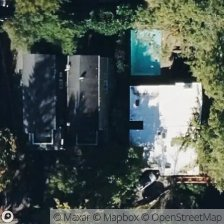

In [15]:
from PIL import Image
Image.open(train_df.loc[5, "image_path"])


In [16]:
"""import pandas as pd

train_df = pd.read_csv("train_with_images.csv")
train_df["image_path"]"""


'import pandas as pd\n\ntrain_df = pd.read_csv("train_with_images.csv")\ntrain_df["image_path"]'